In [1]:
import os
import rdkit
import random
import pickle
import numpy as np
import rdkit.Chem.QED as QED
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from tqdm.contrib.concurrent import process_map
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem

import sa_scorer
from measures import *
from utils import *

## Load data

In [2]:
names = ['ZINC 250k', 'ENAMINE', 'MOSES', 'ChEMBL', 'GDB-17']
file_names = ['zinc', 'enamine', 'moses', 'chembl', 'gdb']

In [15]:
mols_all = []
labels_all = []
mols_dict = dict()

for name, file_name in zip(names, file_names):
    mols = pickle.load(open('circs_qed_{}.pkl'.format(file_name), 'rb'))
    print('loaded', len(mols), 'mols from', name)
    mols_all += mols
    labels_all += [name] * len(mols)
    mols_dict[name] = mols

loaded 2046 mols from ZINC 250k
loaded 1227 mols from ENAMINE
loaded 1720 mols from MOSES
loaded 4543 mols from ChEMBL
loaded 8114 mols from GDB-17


In [16]:
# vecs = process_map(fingerprint, mols_all, chunksize=1000)
vecs = mols_all
nfps = np.array(vecs)

In [24]:
import umap
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD, PCA, KernelPCA
from sklearn.manifold import TSNE, MDS

# COLORS = ['steelblue', 'darkorange', 'forestgreen']

# mapper = umap.UMAP(metric='jaccard', n_neighbors=30, min_dist=0.99)
mapper = umap.UMAP(metric = "jaccard",
                      n_neighbors = 25,
                      n_components = 2,
                      low_memory = False,
                      min_dist = 0.001)
# mapper = PCA(n_components=2)
# mapper = TruncatedSVD(n_components=2)
# mapper = TSNE(n_components=2, perplexity=50)
X = mapper.fit_transform(nfps)

/opt/conda/envs/measure/lib/python3.10/site-packages/umap/umap_.py:1802: UserWarning: gradient function is not yet implemented for jaccard distance metric; inverse_transform will be unavailable
  warn(


In [25]:
idxs = [i for i in range(len(mols_all))]
random.shuffle(idxs)
X_rnd_ord = X[idxs, :]
labels_rnd_ord = [labels_all[i] for i in idxs]

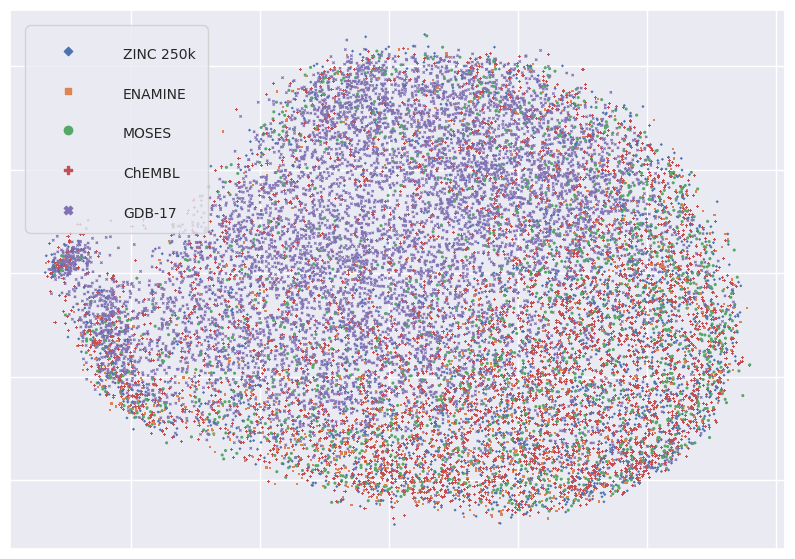

In [26]:
plt.figure(figsize=(10, 7))
sns.set(font_scale=2)
ax = sns.scatterplot(x=X_rnd_ord[:,0], y=X_rnd_ord[:,1], 
                     linewidth=0, alpha=1, 
                     s=5,
                     hue=labels_rnd_ord,
                     style=labels_rnd_ord,
                     hue_order=names)
ax.set(xticklabels=[])
ax.set(yticklabels=[])
plt.setp(ax.get_legend().get_texts(), fontsize='10') 
# plt.scatter()
plt.show()